# The effects of scatter on the mass function

See:
* [Shaw2008](https://iopscience.iop.org/article/10.1088/0004-637X/716/1/281/pdf)

In [3]:
%run ~/.jupyter/config.ipy

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The mass function

Let's assume that we have a very simple mass function: just a power law with some slope $\alpha$. This is not terrible at the high mass end. 

$$
dn/d ln(M) = \alpha
$$


This means that, 

$$
n(M) \propto M^{-\alpha}
$$

we can normalize this, by setting $n(M_0) = n_0$

$$
n(M) = n_0 (M / M_0)^{-\alpha}
$$

In [15]:
a = 2
n0 = 1000

m0, m1 = 1e12, 1e15
m_bins = np.geomspace(m0, m1, 200)

n_lnm = n0 * (m_bins / m0)**(-a)

[None, Text(0.5, 0, 'Ln mass')]

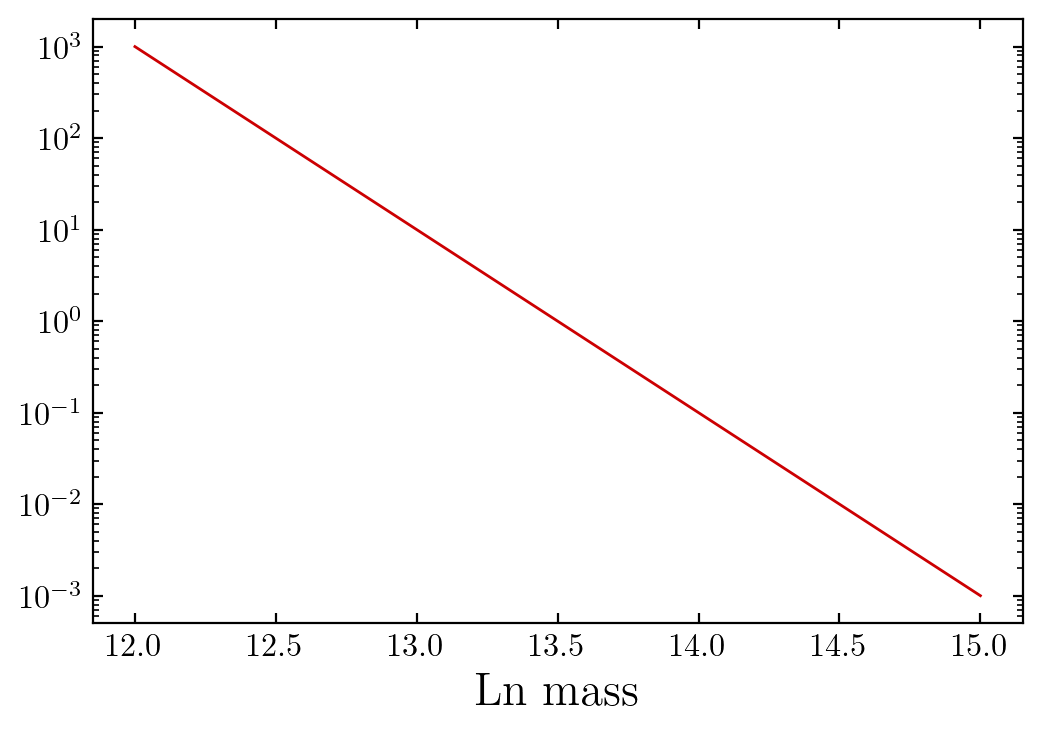

In [16]:
_, ax = plt.subplots()
ax.plot(np.log10(m_bins), n_lnm)
ax.set(yscale="log", xlabel="Ln mass")

## With some lognormal scatter

Let's say that our observations of mass now have some scatter. 0.1 dex. what does this look like?

[None]

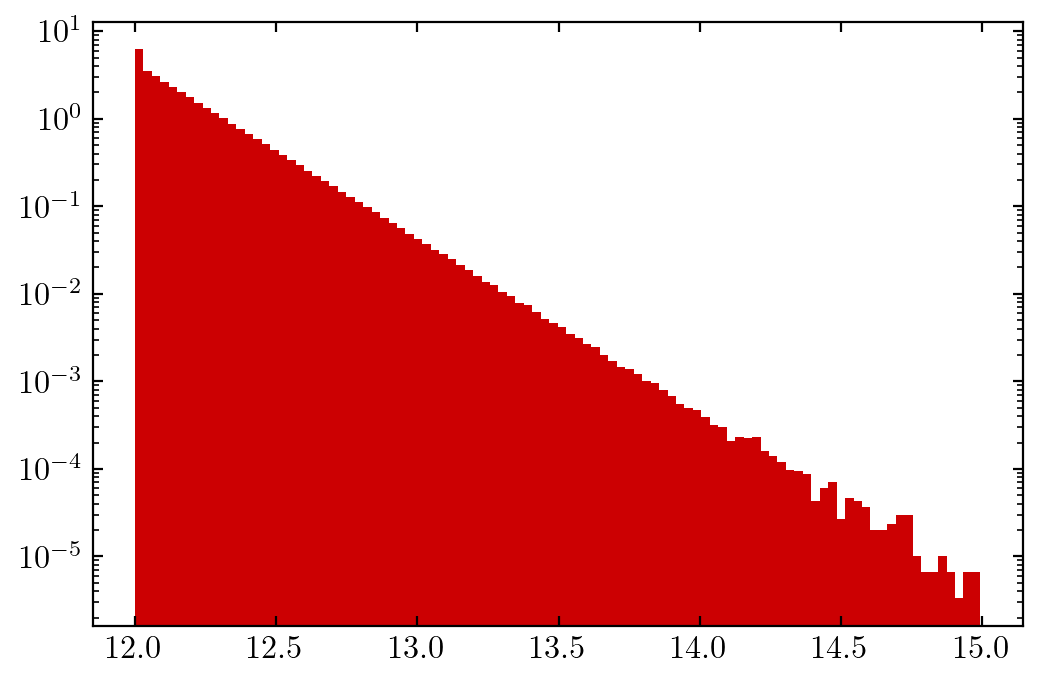

In [18]:
cum_dist = np.cumsum(n_lnm)
cum_dist = cum_dist/cum_dist[-1]
samples = np.interp(np.random.rand(int(1e7)), cum_dist, m_bins)

_, ax = plt.subplots()
ax.hist(np.log10(samples), bins=100, density=True, histtype="step")
ax.set(yscale="log")

[None, (13, 15.2)]

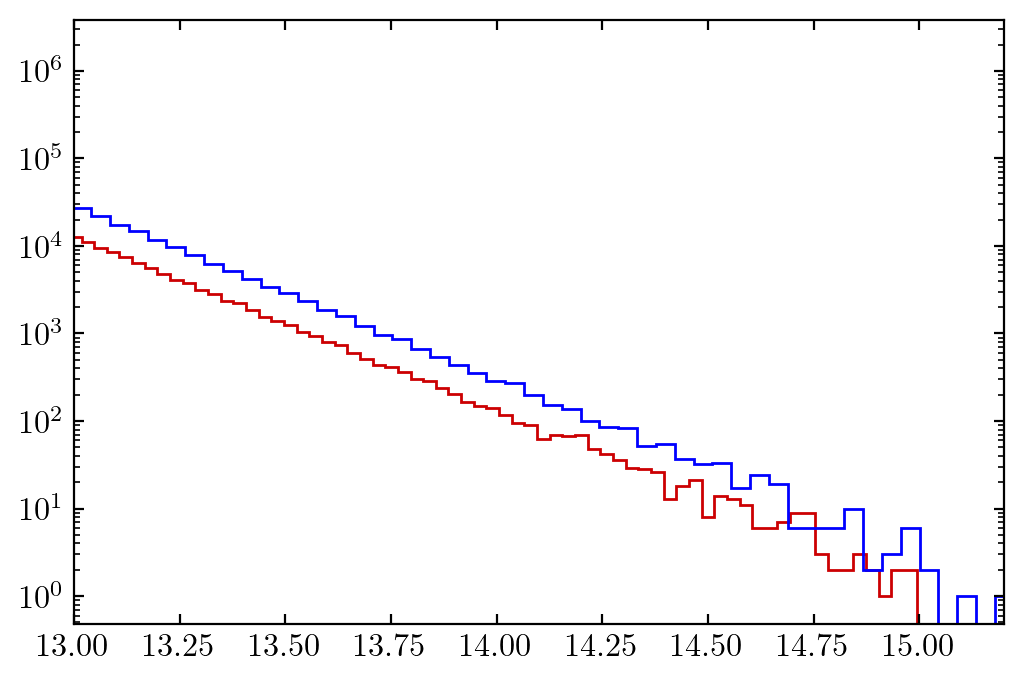

In [28]:
samples2 = 10**(np.log10(samples) + np.random.normal(0, 0.2, len(samples)))
_, ax = plt.subplots()
ax.hist(np.log10(samples), bins=100, histtype="step")
ax.hist(np.log10(samples2), bins=100, histtype="step")
ax.set(yscale="log", xlim=(13, 15.2))